In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import sys, os, gc
import numpy as np
import cv2
import torch
import moviepy.editor as mpy

current_path = rf"{os.getcwd()}"
main_path = os.path.abspath(os.path.dirname(current_path))
sys.path.append(rf"{main_path}")
sys.path.append(rf"{main_path}/src")

import utilities as util
from main import an_inference_engine, video_ad_model_inference_engine, an_ad_offline_result_presenter, cfg

output_dir = cfg.result_path
output_dir
output_dirpath = util.Path(rf"{main_path}/{output_dir}")
output_dirpath.mkdir(exist_ok=True, parents=True)

timer = util.ProcTimer()
timer.display_proctime()
timer.stop()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

%matplotlib inline

process time: 0.0 seconds.


# Image Anonymization

In [2]:
# Configurations
cfg.anony_method_options_list
cfg.object_detection_classname_list
cfg.object_detection_imgsz
cfg.object_detection_thr

['no-an',
 'mask',
 'edge',
 'blur',
 'adaptive_blur',
 'adaptive_full_blur',
 'adaptive_max_blur',
 'pixelization',
 'adaptive_pixelization',
 'adaptive_max_pixelization']

['person', 'cell phone', 'laptop', 'tv']

(320, 240)

0.15

loading image file...
input image size: (2332, 3499, 3)
input image resize: (240, 320, 3)


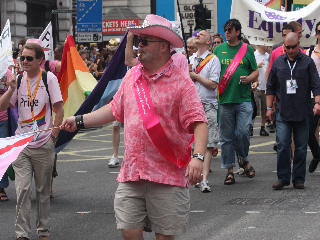

In [3]:
## Load image
img_path = rf"{main_path}/data/VISPR/2017_17368641.jpg"
img_bgr = util.load_image(img_path, img_size=cfg.object_detection_imgsz)
util.Image.fromarray(util.cv2.cvtColor(img_bgr, util.cv2.COLOR_BGR2RGB))

## Single AN [MASKED] Inference

In [4]:
# Load and setup AN method
anony_method = "mask"
object_detection_classes = ['person']
kwargs_detector_method = {"classes":[cfg.object_detection_classid_mapper_dict[classname] for classname in object_detection_classes], 
                              "detection_thr":cfg.object_detection_thr, 
                              "imgsz":cfg.object_detection_imgsz,
                              "device":"cuda"}
kwargs_anony_method = {"color_format":"bgr"}
axisANObj = an_inference_engine(anony_method, 
                                object_detection_classes=['person'],
                                kwargs_detector_method=kwargs_detector_method,
                                kwargs_anony_method=kwargs_anony_method)

init_anonymizer...
{'detector_name': 'body__yolo', 'kwargs_anony_method': {'color_format': 'bgr', 'alpha': 1.0, 'color': '#000000', 'preprocessors_list': [], 'postprocessors_list': []}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
loading object detector...
{'anony_type': 'body', 'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}
##############################
model:  yolov8m-seg.pt
{'method': <function ConventionalImageAnonymizer.silhoutte at 0x0000028499655C60>, 'kwargs': {'color_format': 'bgr', 'alpha': 1.0, 'color': '#000000', 'preprocessors_list': [], 'postprocessors_list': []}}


In [5]:
# AN inference
print("AN inference...")
an_success, an_img = axisANObj.inference(img_bgr)

AN inference...


100%|██████████| 1/1 [00:01<00:00,  1.05s/it]


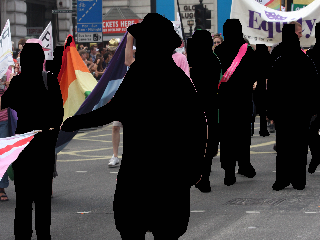

In [6]:
# Display the anonymized image
an_img_rgb = util.Image.fromarray(util.cv2.cvtColor(an_img, util.cv2.COLOR_BGR2RGB))
an_img_rgb

In [7]:
# Save the anonymized image
filename = ".".join(util.Path(img_path).name.split(".")[:-1])
result_filename_template = f'{anony_method}_imwh{an_img.shape[1]}x{an_img.shape[0]}_{filename}'
output_filepath = rf"{output_dirpath}/{result_filename_template}_an.jpg"
print("saving image to ", output_filepath)
an_img_rgb.save(output_filepath)

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/mask_imwh320x240_2017_17368641_an.jpg


## All AN Methods

All AN Methods: ['no-an', 'mask', 'edge', 'blur', 'adaptive_blur', 'adaptive_full_blur', 'adaptive_max_blur', 'pixelization', 'adaptive_pixelization', 'adaptive_max_pixelization']
Processing with anonymization method: no-an
init_anonymizer...
{'detector_name': 'image', 'kwargs_anony_method': {'color_format': 'bgr', 'preprocessors_list': [], 'postprocessors_list': [], 'alpha_mask_scale': 1.0, 'alpha_dim_scale': 0.5}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
Undefined anonymize method: raw. Thus, enforcing using raw footage.
{'method': None, 'kwargs': {}}
AN inference...


100%|██████████| 1/1 [00:00<?, ?it/s]


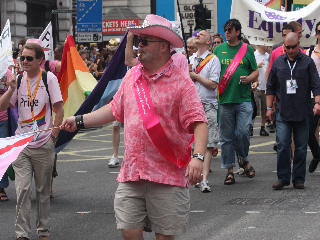

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/no-an_imwh320x240_2017_17368641_an.jpg
Processing with anonymization method: mask
init_anonymizer...
{'detector_name': 'body__yolo', 'kwargs_anony_method': {'color_format': 'bgr', 'alpha': 1.0, 'color': '#000000', 'preprocessors_list': [], 'postprocessors_list': [], 'alpha_mask_scale': 1.0, 'alpha_dim_scale': 0.5}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
loading object detector...
{'anony_type': 'body', 'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}
##############################
model:  yolov8m-seg.pt
{'method': <function ConventionalImageAnonymizer.silhoutte at 0x0000028499655C60>, 'kwargs': {'color_format': 'bgr'

100%|██████████| 1/1 [00:00<00:00,  3.20it/s]


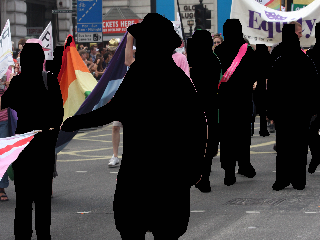

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/mask_imwh320x240_2017_17368641_an.jpg
Processing with anonymization method: edge
init_anonymizer...
{'detector_name': 'body__yolo', 'kwargs_anony_method': {'color_format': 'bgr', 'thr1': 100, 'thr2': 200, 'preprocessors_list': [], 'postprocessors_list': [], 'alpha_mask_scale': 1.0, 'alpha_dim_scale': 0.5}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
loading object detector...
{'anony_type': 'body', 'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}
##############################
model:  yolov8m-seg.pt
{'method': <function ConventionalImageAnonymizer.edge at 0x0000028499655D00>, 'kwargs': {'thr1': 100, 'thr2': 200, 'color_fo

100%|██████████| 1/1 [00:00<00:00,  3.09it/s]


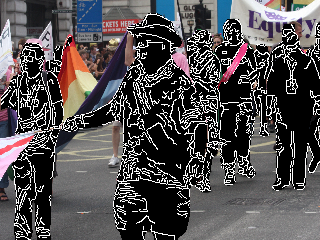

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/edge_imwh320x240_2017_17368641_an.jpg
Processing with anonymization method: blur
init_anonymizer...
{'detector_name': 'body__yolo', 'kwargs_anony_method': {'color_format': 'bgr', 'kernelsize': (13, 13), 'sigma': (10, 10), 'use_adaptive_mask': False, 'preprocessors_list': [], 'postprocessors_list': [], 'alpha_mask_scale': 1.0, 'alpha_dim_scale': 0.5}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
loading object detector...
{'anony_type': 'body', 'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}
##############################
model:  yolov8m-seg.pt
{'method': <function ConventionalImageAnonymizer.guassian_blur at 0x00000284996

100%|██████████| 1/1 [00:00<00:00,  4.07it/s]


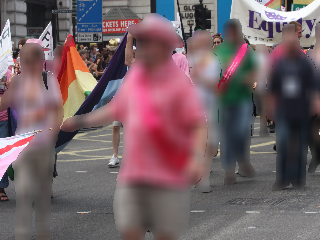

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/blur_imwh320x240_2017_17368641_an.jpg
Processing with anonymization method: adaptive_blur
init_anonymizer...
{'detector_name': 'body__yolo', 'kwargs_anony_method': {'color_format': 'bgr', 'kernelsize': (13, 13), 'sigma': (10, 10), 'use_adaptive_mask': True, 'adaptive_sigma': False, 'alpha_mask_scale': 1.0, 'alpha_dim_scale': 0.5, 'use_log_scaler': True, 'preprocessors_list': [], 'postprocessors_list': []}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
loading object detector...
{'anony_type': 'body', 'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}
##############################
model:  yolov8m-seg.pt
{'method': <function C

100%|██████████| 1/1 [00:00<00:00,  3.48it/s]


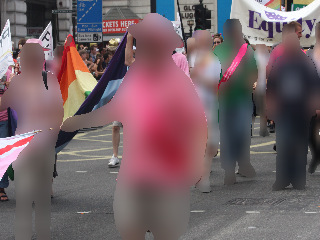

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/adaptive_blur_imwh320x240_2017_17368641_an.jpg
Processing with anonymization method: adaptive_full_blur
init_anonymizer...
{'detector_name': 'body__yolo', 'kwargs_anony_method': {'color_format': 'bgr', 'kernelsize': (13, 13), 'sigma': (10, 10), 'use_adaptive_mask': True, 'adaptive_sigma': True, 'alpha_mask_scale': 1.0, 'alpha_dim_scale': 0.5, 'use_log_scaler': True, 'preprocessors_list': [], 'postprocessors_list': []}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
loading object detector...
{'anony_type': 'body', 'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}
##############################
model:  yolov8m-seg.pt
{'method'

100%|██████████| 1/1 [00:00<00:00,  3.14it/s]


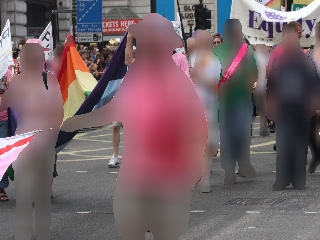

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/adaptive_full_blur_imwh320x240_2017_17368641_an.jpg
Processing with anonymization method: adaptive_max_blur
init_anonymizer...
{'detector_name': 'body__yolo', 'kwargs_anony_method': {'color_format': 'bgr', 'kernelsize': (0, 0), 'sigma': (0, 0), 'use_adaptive_mask': True, 'preprocessors_list': [], 'postprocessors_list': [], 'alpha_mask_scale': 1.0, 'alpha_dim_scale': 0.5}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
loading object detector...
{'anony_type': 'body', 'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}
##############################
model:  yolov8m-seg.pt
{'method': <function ConventionalImageAnonymizer.guassian

100%|██████████| 1/1 [00:00<00:00,  2.87it/s]


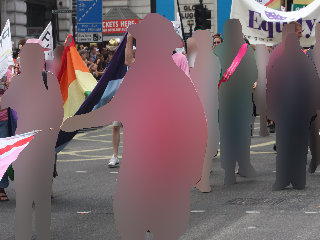

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/adaptive_max_blur_imwh320x240_2017_17368641_an.jpg
Processing with anonymization method: pixelization
init_anonymizer...
{'detector_name': 'body__yolo', 'kwargs_anony_method': {'color_format': 'bgr', 'downsize': 4, 'use_adaptive_mask': False, 'preprocessors_list': [], 'postprocessors_list': [], 'alpha_mask_scale': 1.0, 'alpha_dim_scale': 0.5}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
loading object detector...
{'anony_type': 'body', 'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}
##############################
model:  yolov8m-seg.pt
{'method': <function ConventionalImageAnonymizer.pixelization at 0x0000028499655E40>, 

100%|██████████| 1/1 [00:00<00:00,  2.91it/s]


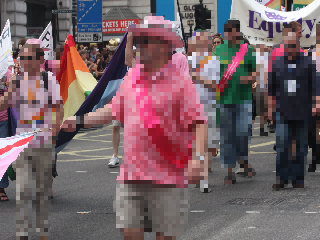

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/pixelization_imwh320x240_2017_17368641_an.jpg
Processing with anonymization method: adaptive_pixelization
init_anonymizer...
{'detector_name': 'body__yolo', 'kwargs_anony_method': {'color_format': 'bgr', 'downsize': 4, 'use_adaptive_mask': True, 'alpha_mask_scale': 1.0, 'alpha_dim_scale': 0.5, 'use_log_scaler': True, 'preprocessors_list': [], 'postprocessors_list': []}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
loading object detector...
{'anony_type': 'body', 'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}
##############################
model:  yolov8m-seg.pt
{'method': <function ConventionalImageAnonymizer.pixelizati

100%|██████████| 1/1 [00:00<00:00,  3.42it/s]


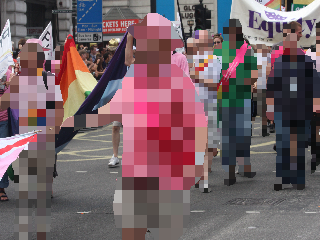

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/adaptive_pixelization_imwh320x240_2017_17368641_an.jpg
Processing with anonymization method: adaptive_max_pixelization
init_anonymizer...
{'detector_name': 'body__yolo', 'kwargs_anony_method': {'color_format': 'bgr', 'downsize': 0, 'use_adaptive_mask': True, 'preprocessors_list': [], 'postprocessors_list': [], 'alpha_mask_scale': 1.0, 'alpha_dim_scale': 0.5}, 'kwargs_detector_method': {'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}, 'target_resolution': None, 'isreset_cache': False}
loading object detector...
{'anony_type': 'body', 'seg_type': 'instant', 'detector_version': 'yolov8m-seg.pt', 'detection_thr': 0.15, 'classes': [0], 'imgsz': (320, 240), 'device': 'cuda'}
##############################
model:  yolov8m-seg.pt
{'method': <function ConventionalImageAnonymizer.pixelization at 0x000

100%|██████████| 1/1 [00:00<00:00,  3.21it/s]


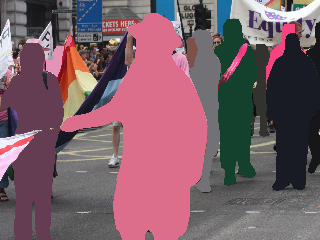

saving image to  c:\Users\mulugetawa\OneDrive - Universitetet i Agder\UiA\Projects\AI4CITIZEN\LA3D\results/adaptive_max_pixelization_imwh320x240_2017_17368641_an.jpg


In [8]:
# General setup for AN inference
object_detection_classes = ['person']
kwargs_detector_method = {"classes":[cfg.object_detection_classid_mapper_dict[classname] for classname in object_detection_classes], 
                              "detection_thr":cfg.object_detection_thr, 
                              "imgsz":cfg.object_detection_imgsz,
                              "device":"cuda"}
kwargs_anony_method = {"alpha_mask_scale":1.0, "alpha_dim_scale":0.5, "color_format":"bgr"}

# output filename extraction
filename = ".".join(util.Path(img_path).name.split(".")[:-1])

# Iterate through all anonymization methods
print("All AN Methods:", cfg.anony_method_options_list)

for anony_method in cfg.anony_method_options_list:
    print(f"Processing with anonymization method: {anony_method}")
    axisANObj = an_inference_engine(anony_method, 
                                object_detection_classes=['person'],
                                kwargs_detector_method=kwargs_detector_method,
                                kwargs_anony_method=kwargs_anony_method)
    
    # AN inference
    print("AN inference...")
    an_success, an_img = axisANObj.inference(img_bgr)
        
    # Display the anonymized image
    an_img_rgb = util.Image.fromarray(util.cv2.cvtColor(an_img, util.cv2.COLOR_BGR2RGB))
    an_img_rgb

    # Save the anonymized image
    result_filename_template = f'{anony_method}_imwh{an_img.shape[1]}x{an_img.shape[0]}_{filename}'
    output_dirpath = util.Path(rf"{main_path}/{output_dir}")
    output_dirpath.mkdir(exist_ok=True, parents=True)
    output_filepath = rf"{output_dirpath}/{result_filename_template}_an.jpg"
    print("saving image to ", output_filepath)
    an_img_rgb.save(output_filepath)

    # break